<a href="https://colab.research.google.com/github/Vipin1184/Web-Scrapping/blob/main/Vipin's_Numerical_Programming_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests as re
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:
Url = "https://www.justwatch.com/in/movies?release_year_from=2000"
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

response = re.get(Url, headers=headers)
response

<Response [200]>

In [ ]:
soup = BeautifulSoup(response.content, 'html.parser')
soup.prettify()
soup

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta charset="utf-8" data-vue-meta="ssr"/><meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/><meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/><meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/><meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/><meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/><meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/><meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" property="og:image:height"/><meta c

## **Fetching Movie URL's**

In [ ]:
Movie_urls = []
url = soup.find_all('a', class_ = "title-list-grid__item--link")
for i in url:
  Movie_url = "https://www.justwatch.com"+i["href"]
  Movie_urls.append(Movie_url)

In [ ]:
Movie_urls

['https://www.justwatch.com/in/movie/project-k',
 'https://www.justwatch.com/in/movie/kill-2024',
 'https://www.justwatch.com/in/movie/munjha',
 'https://www.justwatch.com/in/movie/stree-2',
 'https://www.justwatch.com/in/movie/maharaja-2024',
 'https://www.justwatch.com/in/movie/deadpool-3',
 'https://www.justwatch.com/in/movie/stree',
 'https://www.justwatch.com/in/movie/chandu-champion',
 'https://www.justwatch.com/in/movie/kingdom-of-the-planet-of-the-apes',
 'https://www.justwatch.com/in/movie/aadujeevitham',
 'https://www.justwatch.com/in/movie/agent',
 'https://www.justwatch.com/in/movie/dune-part-two',
 'https://www.justwatch.com/in/movie/deadpool',
 'https://www.justwatch.com/in/movie/phir-aayi-hasseen-dillruba',
 'https://www.justwatch.com/in/movie/indian-2',
 'https://www.justwatch.com/in/movie/laila-majnu',
 'https://www.justwatch.com/in/movie/raayan',
 'https://www.justwatch.com/in/movie/aavesham-2024',
 'https://www.justwatch.com/in/movie/the-ministry-of-ungentlemanly-war

In [ ]:
len(Movie_urls)

100

## **Scrapping Movie Title**

In [ ]:
Movie_title = []
for url in Movie_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser') # Create a soup for each movie
    title = soup.find('div', class_ = "title-detail-hero__details")
    if title:
        title_elt = soup.find('h1', class_ = "title-detail-hero__details__title").text
        Movie_title.append(title_elt)
    else:
        Movie_title.append("No title found")

In [ ]:
Movie_title

[' Kalki 2898-AD (2024)',
 ' Kill (2024)',
 ' Munjya (2024)',
 ' Stree 2: Sarkate Ka Aatank (2024)',
 ' Maharaja (2024)',
 ' Deadpool & Wolverine (2024)',
 ' Stree (2018)',
 ' Chandu Champion (2024)',
 ' Kingdom of the Planet of the Apes (2024)',
 ' The Goat Life (2024)',
 ' Agent (2023)',
 ' Dune: Part Two (2024)',
 ' Deadpool (2016)',
 ' Phir Aayi Hasseen Dillruba (2024)',
 ' Indian 2 (2024)',
 ' Laila Majnu (2018)',
 ' Raayan (2024)',
 ' Aavesham (2024)',
 ' The Ministry of Ungentlemanly Warfare (2024)',
 ' The Gangster, the Cop, the Devil (2019)',
 ' 365 Days (2020)',
 ' Ullozhukku (2024)',
 ' The Fall Guy (2024)',
 ' Weapon (2024)',
 ' Bhaiyya Ji (2024)',
 ' Furiosa: A Mad Max Saga (2024)',
 ' Je Jatt Vigad Gya (2024)',
 ' Golam (2024)',
 ' A Quiet Place: Day One (2024)',
 ' Bad Boys: Ride or Die (2024)',
 ' Siddharth Roy (2024)',
 ' Salaar (2023)',
 ' Love Lies Bleeding (2024)',
 ' Harom Hara (2024)',
 ' Deadpool 2 (2018)',
 ' Aattam (2024)',
 ' Maharshi (2019)',
 ' Dune (2021)',

In [ ]:
len(Movie_title)

100

## **Scrapping release Year**

In [ ]:
Movie_year = []
for url in Movie_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser') # Create a soup for each movie
    year = soup.find('div', class_ = "title-detail-hero__details")
    if year:
        year_elt = soup.find('span', class_ = "release-year").text.strip()
        Movie_year.append(year_elt)
    else:
        Movie_year.append("No year found for: " + url)

In [ ]:
Movie_year

['(2024)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2018)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2023)',
 '(2024)',
 '(2016)',
 '(2024)',
 '(2024)',
 '(2018)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2019)',
 '(2020)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2023)',
 '(2024)',
 '(2024)',
 '(2018)',
 '(2024)',
 '(2019)',
 '(2021)',
 '(2024)',
 '(2024)',
 '(2022)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2023)',
 '(2024)',
 '(2023)',
 '(2024)',
 '(2024)',
 '(2023)',
 '(2024)',
 '(2023)',
 '(2024)',
 '(2016)',
 '(2024)',
 '(2024)',
 '(2023)',
 '(2023)',
 '(2024)',
 '(2021)',
 '(2009)',
 '(2024)',
 '(2024)',
 '(2015)',
 '(2011)',
 '(2024)',
 '(2024)',
 '(2016)',
 '(2001)',
 '(2024)',
 '(2024)',
 '(2002)',
 '(2018)',
 '(2024)',
 '(2015)',
 '(2024)',
 '(2024)',
 '(2024)',
 '(2015)',
 '(2024)',
 '(2004)',
 '(2024)',
 '(2024)',
 '(2014)',
 '(2023)',
 '(2018)',
 '(2024)',
 '(2024)',
 '(2024)',

In [ ]:
len(Movie_year)

100

## **Scrapping Genres**

In [ ]:
Genre = []
for url in Movie_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    span_elt = soup.find('h3', class_='detail-infos__subheading', string='Genres')
    if span_elt:
      span = span_elt.find_next_sibling('div', class_= "detail-infos__value").text.strip()
      Genre.append(span)
    else:
        Genre.append("No genre found")

In [ ]:
Genre

['Drama, Action & Adventure, Fantasy, Science-Fiction, Mystery & Thriller',
 'Crime, Drama, Mystery & Thriller, Action & Adventure',
 'Comedy, Horror',
 'Comedy, Horror',
 'Drama, Mystery & Thriller, Action & Adventure, Crime',
 'Action & Adventure, Comedy, Science-Fiction',
 'Horror, Comedy, Drama',
 'War & Military, Action & Adventure, Drama, History, Sport',
 'Action & Adventure, Science-Fiction, Drama, Mystery & Thriller',
 'Drama',
 'Mystery & Thriller, Action & Adventure',
 'Science-Fiction, Action & Adventure, Drama',
 'Action & Adventure, Comedy',
 'Mystery & Thriller, Romance, Crime, Drama',
 'Mystery & Thriller, Action & Adventure, Drama',
 'Drama, Romance',
 'Action & Adventure, Drama, Mystery & Thriller',
 'Comedy, Action & Adventure',
 'Action & Adventure, Comedy, War & Military',
 'Mystery & Thriller, Action & Adventure, Crime',
 'Drama, Romance, Made in Europe',
 'Drama',
 'Drama, Romance, Action & Adventure, Comedy',
 'Science-Fiction, Mystery & Thriller, Action & Adven

In [ ]:
len(Genre)

100

## **Scrapping IMBD Rating**

In [ ]:
Imdb_Rating = []
for url in Movie_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser') # Create a soup for each movie
    rating = soup.find('div', class_ = "jw-scoring-listing__rating--group jw-scoring-listing__rating--link")
    if rating:
      rating_elt = rating.text[0:3].strip()
      Imdb_Rating.append(rating_elt)
    else:
      Imdb_Rating.append('No rating found')

In [ ]:
Imdb_Rating

['7.4',
 '7.6',
 '7.0',
 '7.8',
 '8.6',
 '8.0',
 '7.5',
 '8.0',
 '6.9',
 '7.3',
 '4.2',
 '8.5',
 '8.0',
 '5.8',
 '4.1',
 '7.7',
 '6.7',
 '7.9',
 '6.8',
 '6.9',
 '3.3',
 '7.6',
 '6.9',
 '6.9',
 '5.1',
 '7.6',
 '4.8',
 '7.3',
 '6.4',
 '6.7',
 '7.4',
 '6.5',
 '6.7',
 '8.0',
 '7.6',
 '8.2',
 '7.2',
 '8.0',
 'No rating found',
 '7.8',
 '6.7',
 '8.4',
 '6.2',
 '6.5',
 '6.8',
 '5.3',
 '8.3',
 '8.3',
 '7.9',
 '6.0',
 '6.3',
 '7.7',
 '5.5',
 '6.7',
 '6.5',
 '8.3',
 '6.9',
 '6.1',
 '8.9',
 '6.1',
 'No rating found',
 '6.9',
 '4.3',
 '5.1',
 '7.8',
 '8.1',
 '7.8',
 '7.8',
 '6.8',
 '7.1',
 '7.6',
 '6.1',
 '6.5',
 '7.3',
 '8.2',
 '6.9',
 '7.1',
 '6.0',
 '7.1',
 '7.2',
 '7.0',
 '7.5',
 '8.3',
 '5.7',
 '5.4',
 '7.7',
 '6.7',
 '8.2',
 '8.8',
 '7.9',
 '6.9',
 '6.6',
 '8.1',
 '8.7',
 '8.2',
 'No rating found',
 '6.9',
 '6.8',
 '8.2',
 '8.0']

In [ ]:
len(Imdb_Rating)

100

## **Scrapping Runtime/Duration**

In [ ]:
Runtime_hour = []
for url in Movie_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    runtime_elt = soup.find('h3', class_='detail-infos__subheading', string='Runtime')
    if runtime_elt:
      runtime = runtime_elt.find_next_sibling('div', class_= "detail-infos__value").text.strip()
      Runtime_hour.append(runtime)
    else:
        Runtime_hour.append("NA")

In [ ]:
Runtime_hour

['2h 55min',
 '1h 45min',
 '2h 3min',
 '2h 27min',
 '2h 30min',
 '2h 8min',
 '2h 8min',
 '2h 22min',
 '2h 25min',
 '2h 0min',
 '2h 34min',
 '2h 47min',
 '1h 48min',
 '2h 13min',
 '3h 0min',
 '2h 19min',
 '2h 25min',
 '2h 38min',
 '2h 2min',
 '1h 50min',
 '1h 54min',
 '2h 3min',
 '2h 6min',
 '2h 0min',
 '2h 30min',
 '2h 29min',
 '2h 12min',
 '2h 0min',
 '1h 39min',
 '1h 55min',
 '2h 28min',
 '2h 55min',
 '1h 44min',
 '2h 34min',
 '2h 0min',
 '2h 19min',
 '2h 56min',
 '2h 35min',
 '2h 3min',
 '1h 37min',
 '2h 36min',
 '2h 2min',
 '1h 35min',
 '2h 12min',
 '2h 10min',
 '2h 39min',
 '3h 0min',
 '2h 15min',
 '2h 4min',
 '2h 19min',
 '1h 34min',
 '2h 30min',
 '1h 49min',
 '2h 37min',
 '2h 3min',
 '2h 41min',
 '1h 41min',
 '1h 55min',
 '2h 26min',
 '3h 24min',
 '2h 30min',
 '2h 15min',
 '2h 34min',
 '2h 28min',
 '2h 36min',
 '1h 35min',
 '2h 39min',
 '2h 39min',
 '2h 16min',
 '2h 50min',
 '2h 32min',
 '1h 55min',
 '2h 12min',
 '1h 35min',
 '1h 53min',
 '1h 56min',
 '2h 1min',
 '2h 20min',
 '1

In [ ]:
len(Runtime_hour)

100

## **Scrapping Age Rating**

In [ ]:
Age_Rating = []
for url in Movie_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    age_elt = soup.find('h3', class_='detail-infos__subheading', string='Age rating')
    if age_elt:
      age_ = age_elt.find_next_sibling('div', class_= "detail-infos__value").text.strip()
      Age_Rating.append(age_)
    else:
      Age_Rating.append("No rating found")

In [ ]:
Age_Rating

['UA',
 'A',
 'No rating found',
 'UA',
 'No rating found',
 'A',
 'UA',
 'UA',
 'No rating found',
 'UA',
 'UA',
 'No rating found',
 'A',
 'No rating found',
 'UA',
 'UA',
 'A',
 'No rating found',
 'No rating found',
 'No rating found',
 'No rating found',
 'U',
 'UA',
 'UA',
 'No rating found',
 'A',
 'No rating found',
 'UA',
 'No rating found',
 'No rating found',
 'A',
 'A',
 'No rating found',
 'A',
 'A',
 'UA',
 'UA',
 'UA',
 'UA',
 'U',
 'UA',
 'UA',
 'No rating found',
 'No rating found',
 'A',
 'No rating found',
 'UA',
 'UA',
 'No rating found',
 'U',
 'U',
 'UA',
 'No rating found',
 'No rating found',
 'UA',
 'U',
 'A',
 'UA',
 'No rating found',
 'A',
 'UA',
 'No rating found',
 'U',
 'No rating found',
 'U',
 'U',
 'UA',
 'UA',
 'UA',
 'UA',
 'U',
 'No rating found',
 'UA',
 'U',
 'A',
 'A',
 'No rating found',
 'UA',
 'No rating found',
 'UA',
 'UA',
 'U',
 'A',
 'UA',
 'No rating found',
 'A',
 'No rating found',
 'UA',
 'UA',
 'UA',
 'UA',
 'A',
 'A',
 'UA',
 'U',
 

In [ ]:
len(Age_Rating)

100

## **Fetching Production Countries Details**

In [ ]:
Country_details = []
for url in Movie_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    country_elt = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')
    if country_elt:
      country = country_elt.find_next_sibling('div', class_= "detail-infos__value").text.strip()
      Country_details.append(country)
    else:
        Country_details.append("No country found")


In [ ]:
Country_details

['India',
 'India, United States',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'India',
 'United States',
 'India, United States',
 'India',
 'United States',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'Turkey, United States, United Kingdom',
 'South Korea',
 'Poland',
 'India',
 'United States, Australia, Canada',
 'India',
 'India',
 'United States, Australia',
 'India',
 'India',
 'United Kingdom, Canada, United States',
 'United States',
 'India',
 'India',
 'United States, United Kingdom',
 'India',
 'United States',
 'India',
 'India',
 'United States',
 'United States',
 'United States',
 'India',
 'India',
 'United States',
 'India',
 'United States',
 'India',
 'United States, United Kingdom',
 'India',
 'Germany, Japan',
 'India',
 'United States',
 'India',
 'United States',
 'United States, Canada',
 'India',
 'India, United States',
 'Canada, United States',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'Thailand, China

In [ ]:
len(Country_details)

100

## **Fetching Streaming Service Details**

In [ ]:
Streaming_Provider =[]
for url in Movie_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    streaming = soup.find_all('img', class_ = "offer__icon")
    if streaming:
      streaming_ = [img['alt'] for img in streaming]
      Streaming_Provider.append(streaming_)
    else:
      Streaming_Provider.append("No streaming provider found")


In [ ]:
Streaming_Provider

[['Amazon Prime Video',
  'Amazon Prime Video',
  'Netflix',
  'Amazon Video',
  'Bookmyshow'],
 'No streaming provider found',
 ['Hotstar'],
 ['Bookmyshow'],
 ['Netflix', 'Bookmyshow'],
 ['Bookmyshow'],
 ['Apple TV', 'Hotstar', 'Apple TV', 'Apple TV'],
 ['Amazon Prime Video', 'Amazon Prime Video', 'Bookmyshow'],
 ['Apple TV', 'Hotstar', 'Apple TV', 'Amazon Video', 'Apple TV'],
 ['Netflix'],
 'No streaming provider found',
 ['Apple TV', 'Jio Cinema', 'Amazon Video', 'Apple TV', 'Apple TV'],
 ['Apple TV', 'Hotstar', 'Amazon Video', 'Apple TV', 'Apple TV'],
 ['Netflix'],
 ['Netflix'],
 ['Zee5'],
 ['Amazon Prime Video',
  'Amazon Prime Video',
  'Sun Nxt',
  'Amazon Video',
  'Bookmyshow'],
 ['Amazon Prime Video', 'Amazon Prime Video', 'Hotstar', 'Amazon Video'],
 ['Amazon Prime Video', 'Amazon Prime Video'],
 'No streaming provider found',
 ['Netflix'],
 ['Amazon Prime Video', 'Amazon Prime Video', 'Amazon Video'],
 ['Apple TV', 'Zee5', 'Amazon Video', 'Apple TV', 'Apple TV'],
 ['Amazon 

In [ ]:
len(Streaming_Provider)

100

## **Now Creating Movies DataFrame**

In [ ]:
import pandas as pd

data = {
    "Url": Movie_urls,
    "Title": Movie_title,
    "Release Year": Movie_year,
    "Genre": Genre,
    "Imdb Rating": Imdb_Rating,
    "Country origin" : Country_details,
    "Streaming Provider": Streaming_Provider,
    "Runtime": Runtime_hour,
    "Age Rating": Age_Rating,

}


Movies_df = pd.DataFrame(data)
Movies_df

,Url,Title,Release Year,Genre,Imdb Rating,Country origin,Streaming Provider,Runtime,Age Rating
0,https://www.justwatch.com/in/movie/project-k,Kalki 2898-AD (2024),(2024),"Drama, Action & Adventure, Fantasy, Science-Fi...",7.4,India,"[Amazon Prime Video, Amazon Prime Video, Netfl...",2h 55min,UA
1,https://www.justwatch.com/in/movie/kill-2024,Kill (2024),(2024),"Crime, Drama, Mystery & Thriller, Action & Adv...",7.6,"India, United States",No streaming provider found,1h 45min,A
2,https://www.justwatch.com/in/movie/munjha,Munjya (2024),(2024),"Comedy, Horror",7.0,India,[Hotstar],2h 3min,No rating found
3,https://www.justwatch.com/in/movie/stree-2,Stree 2: Sarkate Ka Aatank (2024),(2024),"Comedy, Horror",7.8,India,[Bookmyshow],2h 27min,UA
4,https://www.justwatch.com/in/movie/maharaja-2024,Maharaja (2024),(2024),"Drama, Mystery & Thriller, Action & Adventure,...",8.6,India,"[Netflix, Bookmyshow]",2h 30min,No rating found
...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/movie/monkey-man,Monkey Man (2024),(2024),"Action & Adventure, Mystery & Thriller, Crime",No rating found,"United States, Canada, Singapore",No streaming provider found,2h 1min,No rating found
96,https://www.justwatch.com/in/movie/jawan,Jawan (2023),(2023),"Action & Adventure, Mystery & Thriller, Crime,...",6.9,India,"[Apple TV, Netflix, Apple TV, Apple TV]",2h 49min,UA
97,https://www.justwatch.com/in/movie/vedaa,Vedaa (2024),(2024),"Action & Adventure, Drama, Mystery & Thriller",6.8,India,[Bookmyshow],2h 30min,UA
98,https://www.justwatch.com/in/movie/the-wolf-of...,The Wolf of Wall Street (2013),(2013),"Drama, Comedy, Crime",8.2,United States,"[Lionsgate Play, Lionsgate Play Apple TV Chann...",3h 0min,A


## **Scraping TV  Show Data**

In [ ]:
url = "https://www.justwatch.com/in/tv-shows?release_year_from=2000"
response = re.get(url,headers = headers)
soup = BeautifulSoup(response.content, 'html.parser')
soup.prettify()
soup

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta charset="utf-8" data-vue-meta="ssr"/><meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/><meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/><meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/><meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/><meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/><meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/><meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" property="og:image:height"/><meta c

## **Fetching Tv shows Url details**

In [ ]:
Tv_urls = []
url = soup.find_all('a', class_ = "title-list-grid__item--link")
for i in url:
  Tv_url = "https://www.justwatch.com"+i["href"]
  Tv_urls.append(Tv_url)

In [ ]:
Tv_urls

['https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/house-of-the-dragon',
 'https://www.justwatch.com/in/tv-show/adams-sweet-agony',
 'https://www.justwatch.com/in/tv-show/gyaarah-gyaarah',
 'https://www.justwatch.com/in/tv-show/the-boys',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/panchayat',
 'https://www.justwatch.com/in/tv-show/x-x-x-uncensored',
 'https://www.justwatch.com/in/tv-show/shekhar-home',
 'https://www.justwatch.com/in/tv-show/apharan',
 'https://www.justwatch.com/in/tv-show/sweet-home',
 'https://www.justwatch.com/in/tv-show/attack-on-titan',
 'https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/batman-caped-crusader',
 'https://www.justwatch.com/in/tv-show/the-umbrella-academy',
 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba',
 'https://www.justwatch.com/in/tv-show/shahmaran',
 'https://www.justwatch.com/in/tv-show/tribhu

In [ ]:
len(Tv_urls)

100

## **Fetching Tv Show Title details**

In [ ]:
Tv_show_title = []
for url in Tv_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    title_div = soup.find('div', class_ = "title-detail-hero__details")
    if title_div:
        title_elt = title_div.find('h1', class_ = "title-detail-hero__details__title").text
        Tv_show_title.append(title_elt)
    else:
        Tv_show_title.append("No title found")

In [ ]:
Tv_show_title

[' Mirzapur (2018)',
 ' House of the Dragon (2022)',
 " Adam's Sweet Agony (2024)",
 ' Gyaarah Gyaarah (2024)',
 ' The Boys (2019)',
 ' Game of Thrones (2011)',
 ' Panchayat (2020)',
 ' XXX: Uncensored (2018)',
 ' Shekhar Home (2024)',
 ' Apharan (2018)',
 ' Sweet Home (2020)',
 ' Attack on Titan (2013)',
 ' Shōgun (2024)',
 ' Batman: Caped Crusader (2024)',
 ' The Umbrella Academy (2019)',
 ' Demon Slayer: Kimetsu no Yaiba (2019)',
 ' Shahmaran (2023)',
 ' Tribhuvan Mishra CA Topper (2024)',
 ' Mad Men (2007)',
 ' Elite (2018)',
 ' Mastram (2020)',
 ' Money Heist (2017)',
 ' Farzi (2023)',
 ' Presumed Innocent (2024)',
 ' Asur: Welcome to Your Dark Side (2020)',
 ' The Bear (2022)',
 ' Bigg Boss (2006)',
 " A Good Girl's Guide to Murder (2024)",
 ' Breaking Bad (2008)',
 ' Terror Tuesday: Extreme (2024)',
 ' Unsolved Mysteries (2020)',
 ' Gullak (2019)',
 ' Aashram (2020)',
 ' The Family Man (2019)',
 ' Bigg Boss OTT (2021)',
 ' Stranger Things (2016)',
 ' The Rookie (2018)',
 ' From 

In [ ]:
len(Tv_show_title)

100

## **Fetching Release Year**

In [ ]:
Release_year = []
for url in Tv_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    release_div = soup.find('div', class_ = "title-detail-hero__details")
    if release_div:
        year = release_div.find('span', class_ ="release-year").text.strip()
        Release_year.append(year)
    else:
       Release_year.append("year not found")

In [ ]:
Release_year

['(2018)',
 '(2022)',
 '(2024)',
 '(2024)',
 '(2019)',
 '(2011)',
 '(2020)',
 '(2018)',
 '(2024)',
 '(2018)',
 '(2020)',
 '(2013)',
 '(2024)',
 '(2024)',
 '(2019)',
 '(2019)',
 '(2023)',
 '(2024)',
 '(2007)',
 '(2018)',
 '(2020)',
 '(2017)',
 '(2023)',
 '(2024)',
 '(2020)',
 '(2022)',
 '(2006)',
 '(2024)',
 '(2008)',
 '(2024)',
 '(2020)',
 '(2019)',
 '(2020)',
 '(2019)',
 '(2021)',
 '(2016)',
 '(2018)',
 '(2022)',
 '(2019)',
 '(2010)',
 '(2024)',
 '(2020)',
 '(2017)',
 '(2020)',
 '(2018)',
 '(2022)',
 '(2018)',
 '(2024)',
 '(2022)',
 '(2002)',
 '(2013)',
 '(2020)',
 '(2024)',
 '(2008)',
 '(2019)',
 '(2024)',
 '(2010)',
 '(2005)',
 '(2024)',
 '(2018)',
 '(2014)',
 '(2024)',
 '(2009)',
 '(2021)',
 '(2018)',
 '(2017)',
 '(2020)',
 '(2019)',
 '(2007)',
 '(2023)',
 '(2010)',
 '(2024)',
 '(2023)',
 '(2024)',
 '(2021)',
 '(2014)',
 '(2004)',
 '(2024)',
 '(2020)',
 '(2005)',
 '(2013)',
 '(2004)',
 '(2022)',
 '(2019)',
 '(2017)',
 '(2013)',
 '(2021)',
 '(2021)',
 '(2020)',
 '(2020)',
 '(2016)',

In [ ]:
len(Release_year)

100

## **Fetching TV Show Genre Details**

In [ ]:
Tv_show_Genre = []
for url in Tv_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    genre_div = soup.find('h3', class_ = "detail-infos__subheading", string = "Genres")
    if genre_div:
        genre = genre_div.find_next_sibling('div', class_ = "detail-infos__value").text.strip()
        Tv_show_Genre.append(genre)
    else:
        Tv_show_Genre.append("No genre found")

In [ ]:
Tv_show_Genre

['Action & Adventure, Drama, Crime, Mystery & Thriller',
 'Action & Adventure, Science-Fiction, Drama, Fantasy, Romance',
 'Animation',
 'Drama, Fantasy, Science-Fiction',
 'Science-Fiction, Action & Adventure, Crime, Drama, Comedy',
 'Action & Adventure, Science-Fiction, Drama, Fantasy',
 'Drama, Comedy',
 'Comedy, Drama, Romance',
 'Crime, Drama',
 'Action & Adventure, Crime, Mystery & Thriller, Drama',
 'Science-Fiction, Mystery & Thriller, Drama, Fantasy, Horror',
 'Fantasy, Horror, Animation, Action & Adventure, Drama, Science-Fiction',
 'War & Military, Drama, History',
 'Action & Adventure, Animation, Crime, Kids & Family, Fantasy, Science-Fiction',
 'Drama, Fantasy, Science-Fiction, Action & Adventure, Comedy',
 'Animation, Action & Adventure, Science-Fiction, Mystery & Thriller, Fantasy',
 'Science-Fiction, Mystery & Thriller, Action & Adventure, Drama, Romance, Fantasy',
 'Comedy, Crime, Drama, Mystery & Thriller',
 'Drama',
 'Drama, Crime, Mystery & Thriller',
 'Drama, Fanta

In [ ]:
len(Tv_show_Genre)

100

## **Fetching IMDB Rating Details**

In [ ]:
Imdb_rating = []
for url in Tv_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')
    rating = soup.find('div', class_ = "jw-scoring-listing__rating--group jw-scoring-listing__rating--link")
    if rating:
      rating_elt = rating.text[0:3].strip()
      Imdb_rating.append(rating_elt)
    else:
      Imdb_rating.append('No rating found')

In [ ]:
Imdb_rating

['8.4',
 '8.4',
 'No rating found',
 '8.3',
 '8.7',
 '9.2',
 '9.0',
 '4.8',
 '8.3',
 '8.2',
 '7.3',
 '9.1',
 '8.7',
 '7.3',
 '7.9',
 '8.6',
 '5.3',
 '7.0',
 '8.7',
 '7.2',
 '6.9',
 '8.2',
 '8.4',
 '7.7',
 '8.5',
 '8.6',
 '3.6',
 '6.8',
 '9.5',
 '5.8',
 '7.3',
 '9.1',
 '6.6',
 '8.7',
 '1.9',
 '8.7',
 '8.0',
 'No rating found',
 '7.8',
 '9.1',
 '7.2',
 '9.2',
 '8.7',
 '6.9',
 '8.3',
 '8.0',
 '3.4',
 '7.9',
 '7.7',
 '8.4',
 '8.8',
 '8.6',
 '7.2',
 '3.9',
 '9.0',
 '7.5',
 '8.1',
 '8.3',
 '8.4',
 '7.7',
 '8.9',
 '7.7',
 '8.5',
 '8.0',
 '8.4',
 '8.0',
 '7.2',
 '8.3',
 '8.7',
 'No rating found',
 '8.5',
 '6.1',
 '8.7',
 '7.3',
 '8.2',
 '7.5',
 '8.3',
 '7.3',
 '6.5',
 '8.3',
 '6.5',
 '8.7',
 '7.5',
 '9.3',
 '7.7',
 '9.0',
 '8.3',
 '7.4',
 '6.0',
 '8.1',
 '8.5',
 '8.5',
 '7.1',
 '6.6',
 '8.0',
 '8.6',
 '8.1',
 '6.4',
 '6.8',
 '7.7']

In [ ]:
len(Imdb_rating)

100

## **Fetching Age Rating Details**

In [ ]:
Age_rating = []
for url in Tv_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    rating_div = soup.find('h3', class_='detail-infos__subheading', string='Age rating')
    if rating_div:
      rating = rating_div.find_next_sibling('div', class_= "detail-infos__value").text.strip()
      Age_rating.append(rating)
    else:
      Age_rating.append("No rating found")

In [ ]:
Age_rating

['A',
 'A',
 'No rating found',
 'A',
 'A',
 'U',
 'No rating found',
 'No rating found',
 'No rating found',
 'No rating found',
 'A',
 'UA',
 'No rating found',
 'No rating found',
 'No rating found',
 'No rating found',
 'No rating found',
 'No rating found',
 'U',
 'A',
 'No rating found',
 'No rating found',
 'No rating found',
 'No rating found',
 'No rating found',
 'No rating found',
 'No rating found',
 'No rating found',
 'A',
 'No rating found',
 'No rating found',
 'No rating found',
 'No rating found',
 'No rating found',
 'A',
 'No rating found',
 'No rating found',
 'No rating found',
 'No rating found',
 'U',
 'No rating found',
 'No rating found',
 'No rating found',
 'No rating found',
 'A',
 'No rating found',
 'A',
 'No rating found',
 'No rating found',
 'No rating found',
 'A',
 'No rating found',
 'A',
 'U',
 'No rating found',
 'A',
 'U',
 'U',
 'A',
 'A',
 'U',
 'A',
 'No rating found',
 'No rating found',
 'A',
 'U',
 'No rating found',
 'A',
 'U',
 'No rating

In [ ]:
len(Age_rating)

100

## **Fetching Production Country details**

In [ ]:
Country_detail = []
for url in Tv_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    country_div = soup.find('h3', class_='detail-infos__subheading', string=' Production country ')
    if country_div:
      country_ = country_div.find_next_sibling('div', class_= "detail-infos__value").text.strip()
      Country_detail.append(country_)
    else:
      Country_detail.append("No country found")

In [ ]:
Country_detail

['India',
 'United States',
 'Japan',
 'India',
 'United States',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'South Korea',
 'Japan',
 'United States',
 'United States',
 'United States',
 'Japan',
 'Turkey',
 'India',
 'United States',
 'Spain',
 'India',
 'Spain',
 'India',
 'United States',
 'India',
 'United States',
 'India',
 'Germany, United Kingdom',
 'United States',
 'Thailand',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'United States',
 'United States',
 'United States',
 'United Kingdom',
 'South Korea',
 'India',
 'Germany',
 'United States',
 'India',
 'United States',
 'India',
 'India',
 'United States',
 'Japan',
 'United Kingdom',
 'United States, Japan',
 'Spain',
 'India',
 'India',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'United States',
 'South Korea',
 'United States',
 'United States',
 'United Kingdom, United States',
 'Unite

In [ ]:
len(Country_detail)

100

## **Fetching Streaming Service details**

In [ ]:
Streaming_Provider =[]
for url in Tv_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    streaming_elt = soup.find_all('img', class_ = "offer__icon")
    if streaming_elt:
      streaming_ = [img['alt'] for img in streaming_elt]
      Streaming_Provider.append(streaming_)
    else:
      Streaming_Provider.append("No streaming found")

In [ ]:
Streaming_Provider

[['Amazon Prime Video', 'Amazon Prime Video'],
 ['Jio Cinema'],
 ['Amazon Prime Video', 'Amazon Prime Video', 'Anime Times Amazon Channel'],
 ['Zee5'],
 ['Amazon Prime Video', 'Amazon Prime Video'],
 ['Jio Cinema'],
 ['Amazon Prime Video', 'Amazon Prime Video'],
 ['Alt Balaji'],
 ['Jio Cinema'],
 ['Alt Balaji'],
 ['Netflix'],
 ['Amazon Prime Video', 'Amazon Prime Video', 'Anime Times Amazon Channel'],
 ['Hotstar'],
 ['Amazon Prime Video', 'Amazon Prime Video'],
 ['Netflix'],
 ['Netflix', 'Crunchyroll Amazon Channel'],
 ['Netflix'],
 ['Netflix'],
 ['Netflix',
  'Lionsgate Play',
  'Lionsgate Play Apple TV Channel',
  'Lionsgate Play Amazon Channel'],
 ['Netflix'],
 'No streaming found',
 ['Netflix'],
 ['Amazon Prime Video', 'Amazon Prime Video'],
 ['Apple TV Plus', 'Apple TV+'],
 ['Jio Cinema'],
 ['Hotstar'],
 ['Hotstar'],
 ['Netflix'],
 ['Netflix'],
 ['Netflix'],
 ['Netflix'],
 ['Sony Liv'],
 ['MX Player'],
 ['Amazon Prime Video', 'Amazon Prime Video'],
 ['Jio Cinema'],
 ['Netflix'],
 

In [ ]:
len(Streaming_Provider)

100

## **Fetching Duration Details**

In [ ]:
Runtime_duration = []
for url in Tv_urls:
    response = re.get(url, headers=headers)
    soup = BeautifulSoup(response.text, "html.parser")
    runtime_div = soup.find('h3', class_='detail-infos__subheading', string='Runtime')
    if runtime_div:
      runtime_ = runtime_div.find_next_sibling('div', class_= "detail-infos__value").text.strip()
      Runtime_duration.append(runtime_)
    else:
      Runtime_duration.append("NA")

In [ ]:
Runtime_duration

['50min',
 '1h 2min',
 '3min',
 '43min',
 '1h 1min',
 '58min',
 '35min',
 '22min',
 '42min',
 '24min',
 '58min',
 '25min',
 '59min',
 '25min',
 '51min',
 '26min',
 '49min',
 '57min',
 '49min',
 '49min',
 '28min',
 '50min',
 '56min',
 '43min',
 '47min',
 '34min',
 '1h 15min',
 '44min',
 '47min',
 '43min',
 '45min',
 '30min',
 '43min',
 '45min',
 '1h 28min',
 '1h 1min',
 '43min',
 '50min',
 '49min',
 '1h 28min',
 '58min',
 '52min',
 '56min',
 '31min',
 '31min',
 '38min',
 '44min',
 '26min',
 '46min',
 '23min',
 '58min',
 '24min',
 '46min',
 '45min',
 '41min',
 '56min',
 '46min',
 '24min',
 '59min',
 '48min',
 '1h 1min',
 '52min',
 '21min',
 '55min',
 '35min',
 '43min',
 '56min',
 '58min',
 '24min',
 '45min',
 '54min',
 '1h 4min',
 '58min',
 '1h 3min',
 '47min',
 '45min',
 '43min',
 '46min',
 '34min',
 '50min',
 '43min',
 '44min',
 '1h 1min',
 '1h 5min',
 '19min',
 '23min',
 '39min',
 '38min',
 '19min',
 '43min',
 '1h 1min',
 '44min',
 '52min',
 '53min',
 '57min',
 '1h 14min',
 '51min',
 

In [ ]:
len(Runtime_duration)

100

## **Creating TV Show DataFrame**

In [ ]:
dict_ ={"Title":Tv_show_title,"Release Year":Release_year,"Genre":Tv_show_Genre,"Imdb Rating":Imdb_rating,
        "Runtime":Runtime_duration,"Age Rating":Age_rating,"Country origin":Country_detail,
        "Url":Tv_urls,"Streaming Provider":Streaming_Provider}
Tv_shows_df = pd.DataFrame(dict_)
Tv_shows_df

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Url,Streaming Provider
0,Mirzapur (2018),(2018),"Action & Adventure, Drama, Crime, Mystery & Th...",8.4,50min,A,India,https://www.justwatch.com/in/tv-show/mirzapur,"[Amazon Prime Video, Amazon Prime Video]"
1,House of the Dragon (2022),(2022),"Action & Adventure, Science-Fiction, Drama, Fa...",8.4,1h 2min,A,United States,https://www.justwatch.com/in/tv-show/house-of-...,[Jio Cinema]
2,Adam's Sweet Agony (2024),(2024),Animation,No rating found,3min,No rating found,Japan,https://www.justwatch.com/in/tv-show/adams-swe...,"[Amazon Prime Video, Amazon Prime Video, Anime..."
3,Gyaarah Gyaarah (2024),(2024),"Drama, Fantasy, Science-Fiction",8.3,43min,A,India,https://www.justwatch.com/in/tv-show/gyaarah-g...,[Zee5]
4,The Boys (2019),(2019),"Science-Fiction, Action & Adventure, Crime, Dr...",8.7,1h 1min,A,United States,https://www.justwatch.com/in/tv-show/the-boys,"[Amazon Prime Video, Amazon Prime Video]"
...,...,...,...,...,...,...,...,...,...
95,Love Next Door (2024),(2024),"Drama, Comedy, Romance",8.6,1h 14min,No rating found,South Korea,https://www.justwatch.com/in/tv-show/moms-frie...,[Netflix]
96,The Gentlemen (2024),(2024),"Action & Adventure, Comedy, Crime, Drama",8.1,51min,A,"United Kingdom, United States",https://www.justwatch.com/in/tv-show/the-gentl...,[Netflix]
97,She (2020),(2020),"Crime, Drama",6.4,42min,No rating found,India,https://www.justwatch.com/in/tv-show/she,[Netflix]
98,Auto Shankar (2019),(2019),"Crime, Mystery & Thriller",6.8,30min,UA,India,https://www.justwatch.com/in/tv-show/auto-shankar,"[Zee5, VI movies and tv]"


In [ ]:
combined_df = pd.concat([Movies_df, Tv_shows_df])
combined_df

,Url,Title,Release Year,Genre,Imdb Rating,Country origin,Streaming Provider,Runtime,Age Rating
0,https://www.justwatch.com/in/movie/project-k,Kalki 2898-AD (2024),(2024),"Drama, Action & Adventure, Fantasy, Science-Fi...",7.4,India,"[Amazon Prime Video, Amazon Prime Video, Netfl...",2h 55min,UA
1,https://www.justwatch.com/in/movie/kill-2024,Kill (2024),(2024),"Crime, Drama, Mystery & Thriller, Action & Adv...",7.6,"India, United States",No streaming provider found,1h 45min,A
2,https://www.justwatch.com/in/movie/munjha,Munjya (2024),(2024),"Comedy, Horror",7.0,India,[Hotstar],2h 3min,No rating found
3,https://www.justwatch.com/in/movie/stree-2,Stree 2: Sarkate Ka Aatank (2024),(2024),"Comedy, Horror",7.8,India,[Bookmyshow],2h 27min,UA
4,https://www.justwatch.com/in/movie/maharaja-2024,Maharaja (2024),(2024),"Drama, Mystery & Thriller, Action & Adventure,...",8.6,India,"[Netflix, Bookmyshow]",2h 30min,No rating found
...,...,...,...,...,...,...,...,...,...
95,https://www.justwatch.com/in/tv-show/moms-frie...,Love Next Door (2024),(2024),"Drama, Comedy, Romance",8.6,South Korea,[Netflix],1h 14min,No rating found
96,https://www.justwatch.com/in/tv-show/the-gentl...,The Gentlemen (2024),(2024),"Action & Adventure, Comedy, Crime, Drama",8.1,"United Kingdom, United States",[Netflix],51min,A
97,https://www.justwatch.com/in/tv-show/she,She (2020),(2020),"Crime, Drama",6.4,India,[Netflix],42min,No rating found
98,https://www.justwatch.com/in/tv-show/auto-shankar,Auto Shankar (2019),(2019),"Crime, Mystery & Thriller",6.8,India,"[Zee5, VI movies and tv]",30min,UA


## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Remove the parenthesis from the 'Release Year' column in both DataFrames.
from datetime import datetime, timedelta
Movies_df['Release Year'] = Movies_df['Release Year'].astype(str)
Tv_shows_df['Release Year'] = Tv_shows_df['Release Year'].astype(str)

# Remove the parenthesis from the 'Release Year' column in both DataFrames.
Movies_df['Release Year'] = Movies_df['Release Year'].str.strip('()')
Tv_shows_df['Release Year'] = Tv_shows_df['Release Year'].str.strip('()')

# Convert the 'Release Year' column to datetime objects and extract the year
Movies_df['Release Year'] = pd.to_datetime(Movies_df['Release Year'], format='%Y').dt.year
Tv_shows_df['Release Year'] = pd.to_datetime(Tv_shows_df['Release Year'], format ='%Y').dt.year

current_year = datetime.now().year

# Convert 'Imdb Rating' column to numeric type before comparison
Movies_df['Imdb Rating'] = pd.to_numeric(Movies_df['Imdb Rating'], errors = 'coerce')
Movie_filter_df = Movies_df[(Movies_df['Release Year'] >= current_year-2) & (Movies_df['Imdb Rating'] >= 7)]

Tv_shows_df['Imdb Rating'] = pd.to_numeric(Tv_shows_df['Imdb Rating'], errors='coerce') # This line was added to ensure the column is of numeric type.
Tv_filter_df = Tv_shows_df[(Tv_shows_df['Release Year'] >= current_year-2) & (Tv_shows_df['Imdb Rating'] >= 7)]

In [ ]:
Movie_filter_df

,Url,Title,Release Year,Genre,Imdb Rating,Country origin,Streaming Provider,Runtime,Age Rating
0,https://www.justwatch.com/in/movie/project-k,Kalki 2898-AD (2024),2024,"Drama, Action & Adventure, Fantasy, Science-Fi...",7.4,India,"[Amazon Prime Video, Amazon Prime Video, Netfl...",2h 55min,UA
1,https://www.justwatch.com/in/movie/kill-2024,Kill (2024),2024,"Crime, Drama, Mystery & Thriller, Action & Adv...",7.6,"India, United States",No streaming provider found,1h 45min,A
2,https://www.justwatch.com/in/movie/munjha,Munjya (2024),2024,"Comedy, Horror",7.0,India,[Hotstar],2h 3min,No rating found
3,https://www.justwatch.com/in/movie/stree-2,Stree 2: Sarkate Ka Aatank (2024),2024,"Comedy, Horror",7.8,India,[Bookmyshow],2h 27min,UA
4,https://www.justwatch.com/in/movie/maharaja-2024,Maharaja (2024),2024,"Drama, Mystery & Thriller, Action & Adventure,...",8.6,India,"[Netflix, Bookmyshow]",2h 30min,No rating found
5,https://www.justwatch.com/in/movie/deadpool-3,Deadpool & Wolverine (2024),2024,"Action & Adventure, Comedy, Science-Fiction",8.0,United States,[Bookmyshow],2h 8min,A
7,https://www.justwatch.com/in/movie/chandu-cham...,Chandu Champion (2024),2024,"War & Military, Action & Adventure, Drama, His...",8.0,India,"[Amazon Prime Video, Amazon Prime Video, Bookm...",2h 22min,UA
9,https://www.justwatch.com/in/movie/aadujeevitham,The Goat Life (2024),2024,Drama,7.3,"India, United States",[Netflix],2h 0min,UA
11,https://www.justwatch.com/in/movie/dune-part-two,Dune: Part Two (2024),2024,"Science-Fiction, Action & Adventure, Drama",8.5,United States,"[Apple TV, Jio Cinema, Amazon Video, Apple TV,...",2h 47min,No rating found
17,https://www.justwatch.com/in/movie/aavesham-2024,Aavesham (2024),2024,"Comedy, Action & Adventure",7.9,India,"[Amazon Prime Video, Amazon Prime Video, Hotst...",2h 38min,No rating found


In [ ]:
Tv_filter_df

,Title,Release Year,Genre,Imdb Rating,Runtime,Age Rating,Country origin,Url,Streaming Provider
1,House of the Dragon (2022),2022,"Action & Adventure, Science-Fiction, Drama, Fa...",8.4,1h 2min,A,United States,https://www.justwatch.com/in/tv-show/house-of-...,[Jio Cinema]
3,Gyaarah Gyaarah (2024),2024,"Drama, Fantasy, Science-Fiction",8.3,43min,A,India,https://www.justwatch.com/in/tv-show/gyaarah-g...,[Zee5]
8,Shekhar Home (2024),2024,"Crime, Drama",8.3,42min,No rating found,India,https://www.justwatch.com/in/tv-show/shekhar-home,[Jio Cinema]
12,Shōgun (2024),2024,"War & Military, Drama, History",8.7,59min,No rating found,United States,https://www.justwatch.com/in/tv-show/shogun-2024,[Hotstar]
13,Batman: Caped Crusader (2024),2024,"Action & Adventure, Animation, Crime, Kids & F...",7.3,25min,No rating found,United States,https://www.justwatch.com/in/tv-show/batman-ca...,"[Amazon Prime Video, Amazon Prime Video]"
17,Tribhuvan Mishra CA Topper (2024),2024,"Comedy, Crime, Drama, Mystery & Thriller",7.0,57min,No rating found,India,https://www.justwatch.com/in/tv-show/tribhuvan...,[Netflix]
22,Farzi (2023),2023,"Drama, Crime, Mystery & Thriller",8.4,56min,No rating found,India,https://www.justwatch.com/in/tv-show/farzi,"[Amazon Prime Video, Amazon Prime Video]"
23,Presumed Innocent (2024),2024,"Crime, Drama",7.7,43min,No rating found,United States,https://www.justwatch.com/in/tv-show/presumed-...,"[Apple TV Plus, Apple TV+]"
25,The Bear (2022),2022,"Drama, Comedy",8.6,34min,No rating found,United States,https://www.justwatch.com/in/tv-show/the-bear,[Hotstar]
40,The Frog (2024),2024,"Mystery & Thriller, Crime, Drama",7.2,58min,No rating found,South Korea,https://www.justwatch.com/in/tv-show/the-frog-...,[Netflix]


In [ ]:
Filter_df = pd.concat([Movie_filter_df, Tv_filter_df])
Filter_df

,Url,Title,Release Year,Genre,Imdb Rating,Country origin,Streaming Provider,Runtime,Age Rating
0,https://www.justwatch.com/in/movie/project-k,Kalki 2898-AD (2024),2024,"Drama, Action & Adventure, Fantasy, Science-Fi...",7.4,India,"[Amazon Prime Video, Amazon Prime Video, Netfl...",2h 55min,UA
1,https://www.justwatch.com/in/movie/kill-2024,Kill (2024),2024,"Crime, Drama, Mystery & Thriller, Action & Adv...",7.6,"India, United States",No streaming provider found,1h 45min,A
2,https://www.justwatch.com/in/movie/munjha,Munjya (2024),2024,"Comedy, Horror",7.0,India,[Hotstar],2h 3min,No rating found
3,https://www.justwatch.com/in/movie/stree-2,Stree 2: Sarkate Ka Aatank (2024),2024,"Comedy, Horror",7.8,India,[Bookmyshow],2h 27min,UA
4,https://www.justwatch.com/in/movie/maharaja-2024,Maharaja (2024),2024,"Drama, Mystery & Thriller, Action & Adventure,...",8.6,India,"[Netflix, Bookmyshow]",2h 30min,No rating found
5,https://www.justwatch.com/in/movie/deadpool-3,Deadpool & Wolverine (2024),2024,"Action & Adventure, Comedy, Science-Fiction",8.0,United States,[Bookmyshow],2h 8min,A
7,https://www.justwatch.com/in/movie/chandu-cham...,Chandu Champion (2024),2024,"War & Military, Action & Adventure, Drama, His...",8.0,India,"[Amazon Prime Video, Amazon Prime Video, Bookm...",2h 22min,UA
9,https://www.justwatch.com/in/movie/aadujeevitham,The Goat Life (2024),2024,Drama,7.3,"India, United States",[Netflix],2h 0min,UA
11,https://www.justwatch.com/in/movie/dune-part-two,Dune: Part Two (2024),2024,"Science-Fiction, Action & Adventure, Drama",8.5,United States,"[Apple TV, Jio Cinema, Amazon Video, Apple TV,...",2h 47min,No rating found
17,https://www.justwatch.com/in/movie/aavesham-2024,Aavesham (2024),2024,"Comedy, Action & Adventure",7.9,India,"[Amazon Prime Video, Amazon Prime Video, Hotst...",2h 38min,No rating found


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
mean_imdb_rating_movie = round(Movies_df['Imdb Rating'].mean(),2)
mean_imdb_rating_tv = round(Tv_shows_df['Imdb Rating'].mean(),2)

print(mean_imdb_rating_movie)
print(mean_imdb_rating_tv)

7.07
7.73


## **Analyzing Top Genres**

In [ ]:
Genre_count = combined_df['Genre'].value_counts().sort_values(ascending=False)
Top_5_genres = Genre_count.head(5)
print(Top_5_genres)

Genre
Drama                               13
Crime, Drama, Mystery & Thriller     5
Comedy, Drama, Romance               4
Crime, Drama                         4
Drama, Crime, Mystery & Thriller     4
Name: count, dtype: int64


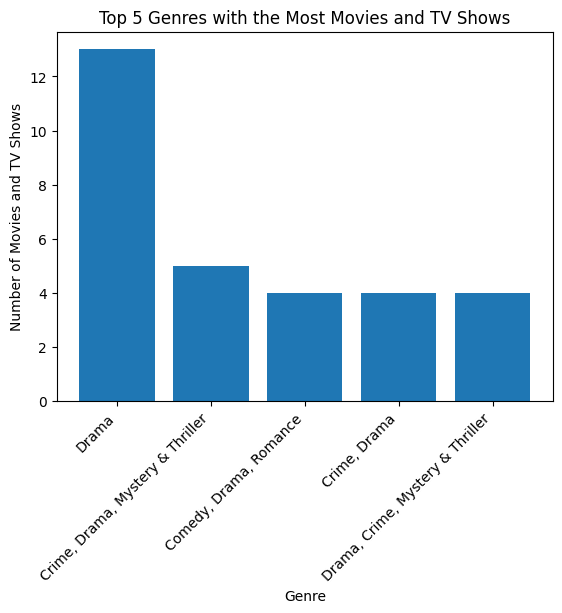

In [ ]:
##Lets Visualize
import matplotlib.pyplot as plt
plt.bar(x = Top_5_genres.index,height = Top_5_genres.values)
plt.xlabel('Genre')
plt.ylabel('Number of Movies and TV Shows')
plt.title('Top 5 Genres with the Most Movies and TV Shows')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.show()

## **Finding Predominant Streaming Service**

In [ ]:
# Count Occurrences:
Streaming_service_counts = combined_df['Streaming Provider'].value_counts()
Streaming_service_counts

,count
Streaming Provider,
[Netflix],42
"[Amazon Prime Video, Amazon Prime Video]",21
[Jio Cinema],14
[Hotstar],13
No streaming provider found,10
...,...
"[Amazon Prime Video, Apple TV, Amazon Prime Video, Apple TV, Amazon Video, Apple TV]",1
"[Apple TV, Jio Cinema, Apple TV, Tata Play, Apple TV]",1
"[Apple TV, Netflix, Zee5, Amazon Video, Apple TV, Apple TV]",1


In [ ]:
Top_streaming_service = Streaming_service_counts.head(1)

print(Top_streaming_service)

Streaming Provider
[Netflix]    42
Name: count, dtype: int64


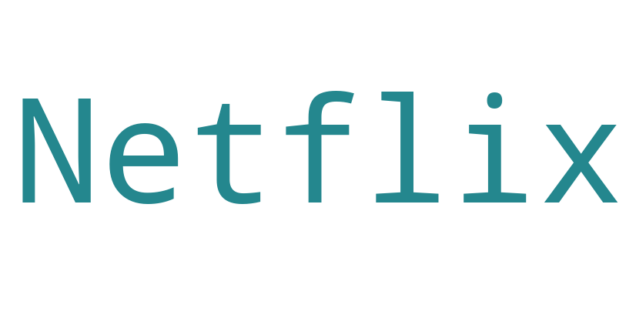

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Create a WordCloud object with the text "Netflix"
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies({'Netflix': 1})

# Display the generated word cloud using Matplotlib
plt.figure(figsize=(10, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()

## **Task 3 :- Data Export**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

combined_df.to_csv('/content/drive/My Drive/original_data.csv')
Filter_df.to_csv('/content/drive/My Drive/filtered_data.csv')

# **Dataset Drive Link (View Access with Anyone) -**
Link1:
https://drive.google.com/file/d/1-ANT5A3kJhgJKxx_PYYAoSUdPeEylXa3/view?usp=sharing

Link2:
https://drive.google.com/file/d/1-AHYil97E-3HByzofJ5pW7OS6M4R1tab/view?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***